In [39]:
def dump_ground_program(solver):
    print(solver.prg)

In [40]:
from incraf import incr_af_solver

from clingo.core import TruthValue
from clingo.control import Control
from clingo.symbol import Number, Function, Symbol
from clingo.solving import Model, SolveResult

from clingox.program import Program, ProgramObserver
from clingox.backend import SymbolicBackend

In [41]:
def on_model(m: Model):
    print(f"Model {m.number}:", m)

# Loading a simple AF statically

The following prepares a solver that just enumerates all models. 

In [42]:
ctl1 = Control(arguments=["--models=0"])
prg1 = Program()
ctl1.register_observer(ProgramObserver(prg1))

In [43]:
ctl1.load("asp/af1.lp")
ctl1.load("dung/naive.dl")
ctl1.load("asp/filter.lp")

ctl1.ground()

`Program` and `ProgramObserver` allow us to access the ground program if needed, which can be printed below.

In [44]:
# print(prg1)

# Loading a simple AF incrementally

The following prepares all the data structures that we need to allow an AF to change after the initial input. 

For this, we break up the encoding of the semantics into parts that need to be added when an argument resp. an attack is added. (Happens in `incraf.py`)

We can read both clingo files and a DIMACS-like format. (Actually, DIMACS-like crashes Python right now, so no.)

In [45]:
af1 = incr_af_solver("naive", "asp/af1.lp")

Again, we can print the ground program

In [46]:
# print(af1.prg)

# Comparing the two approaches

which means for now, they still don't yield the exact same results every time.

For the simple AF with *naive* semantics, they do.

In [47]:
print("=== Static solver ===")
ctl1.solve(on_model=on_model)

print("\n=== Incremental solver ===")
af1.solve_enum(verbose=True);

=== Static solver ===
Model 1: in(a) in(c)
Model 2: in(b)

=== Incremental solver ===
DEBUG Model 1: in(b)
DEBUG Model 2: in(a) in(c)


If we try *admissible* semantics, the simple AF also works.

In [48]:
ctl2 = Control(arguments=["--models=0"])
prg2 = Program()
ctl2.register_observer(ProgramObserver(prg2))

ctl2.load("asp/af1.lp")
ctl2.load("dung/adm.dl")
ctl2.load("asp/filter.lp")

ctl2.ground()

af1_adm = incr_af_solver("adm", "asp/af1.lp")

In [49]:
print("=== Static solver ===")
ctl2.solve(on_model=on_model)

print("\n=== Incremental solver ===")
af1_adm.solve_enum(verbose=True);

=== Static solver ===
Model 1: 
Model 2: in(a) in(c)
Model 3: in(a)
Model 4: in(c)

=== Incremental solver ===
DEBUG Model 1: in(a) in(c)
DEBUG Model 2: in(a)
DEBUG Model 3: 
DEBUG Model 4: in(c)


# A more complex AF

For another, more complex AF 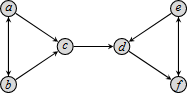, things get weird again. 

## Naive semantics

In [50]:
ctl3 = Control(arguments=["--models=0"])
prg3 = Program()
ctl3.register_observer(ProgramObserver(prg2))

ctl3.load("asp/af2.lp")
ctl3.load("dung/naive.dl")
ctl3.load("asp/filter.lp")

ctl3.ground()

af2_naive = incr_af_solver("naive", "asp/af2.lp")

In the following example, the number of models does not agree at all.

In [51]:
print("=== Static solver ===")
ctl3.solve(on_model=on_model)

print("\n=== Incremental solver ===")
af2_naive.solve_enum(verbose=True);

=== Static solver ===
Model 1: in(a) in(f)
Model 2: in(a) in(e)
Model 3: in(b) in(f)
Model 4: in(b) in(e)
Model 5: in(a) in(d)
Model 6: in(b) in(d)
Model 7: in(c) in(e)
Model 8: in(c) in(f)

=== Incremental solver ===
DEBUG Model 1: in(a) in(d)
DEBUG Model 2: in(a) in(e)
DEBUG Model 3: in(a) in(f)
DEBUG Model 4: in(b) in(f)
DEBUG Model 5: in(c) in(f)
DEBUG Model 6: in(b) in(d)
DEBUG Model 7: in(c) in(e)
DEBUG Model 8: in(b) in(e)


## Admissible semantics

In [52]:
ctl4 = Control(arguments=["--models=0"])
prg4 = Program()
ctl4.register_observer(ProgramObserver(prg2))

ctl4.load("asp/af2.lp")
ctl4.load("dung/adm.dl")
ctl4.load("asp/filter.lp")

ctl4.ground()

af2_adm = incr_af_solver("adm", "asp/af2.lp")

Here, the models do not agree at all, but interestingly the incremental admissible extensions agree with the static naive ones, consistently missing `b` and `f`.

In [53]:
print("=== Static solver ===")
ctl4.solve(on_model=on_model)

print("\n=== Incremental solver ===")
af2_adm.solve_enum(verbose=True);

=== Static solver ===
Model 1: in(a) in(e)
Model 2: in(a)
Model 3: in(b) in(e)
Model 4: in(e)
Model 5: in(b)
Model 6: 

=== Incremental solver ===
DEBUG Model 1: in(a) in(e)
DEBUG Model 2: in(a)
DEBUG Model 3: in(b) in(e)
DEBUG Model 4: in(e)
DEBUG Model 5: 
DEBUG Model 6: in(b)


[[Function('in', [Function('a', [], True)], True),
  Function('in', [Function('e', [], True)], True)],
 [Function('in', [Function('a', [], True)], True)],
 [Function('in', [Function('b', [], True)], True),
  Function('in', [Function('e', [], True)], True)],
 [Function('in', [Function('e', [], True)], True)],
 [],
 [Function('in', [Function('b', [], True)], True)]]

# A middle AF

In [54]:
ctl5 = Control(arguments=["--models=0"])
prg5 = Program()
ctl5.register_observer(ProgramObserver(prg5))

ctl5.load("asp/af3.lp")
ctl5.load(f"dung/naive.dl")
ctl5.load("asp/filter.lp")
ctl5.ground()

af3 = incr_af_solver("naive", "asp/af3.lp")

Grounding for the static version

In [55]:
# print(prg5)

Grounding for the incremental version

In [56]:
# print(af3.prg)

Enumerating the models with both approaches, they don't agree.

In [57]:
print("\n\n === Solve and enumerate the static thing ===")
ctl5.solve(on_model=on_model)
print("\n\n === Solve and enumerate the incremental version ===")
af3.solve_enum(verbose=True);



 === Solve and enumerate the static thing ===
Model 1: in(b) in(d)
Model 2: in(a) in(c)


 === Solve and enumerate the incremental version ===


[[Function('in', [Function('a', [], True)], True),
  Function('in', [Function('c', [], True)], True)],
 [Function('in', [Function('b', [], True)], True),
  Function('in', [Function('d', [], True)], True)]]